<a href="https://colab.research.google.com/github/qAp/fsdl-text-recognizer-2021-labs/blob/lab3/colab/01_look_at_emnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looking at EMNIST data

In [ ]:
! pip install pytorch_lightning -q
! pip install wandb -q

     |████████████████████████████████| 915 kB 13.5 MB/s 
     |████████████████████████████████| 829 kB 49.5 MB/s 
     |████████████████████████████████| 118 kB 49.3 MB/s 
     |████████████████████████████████| 272 kB 48.9 MB/s 
     |████████████████████████████████| 636 kB 53.6 MB/s 
     |████████████████████████████████| 5.6 MB 37.9 MB/s 
     |████████████████████████████████| 1.3 MB 46.6 MB/s 
     |████████████████████████████████| 142 kB 49.4 MB/s 
     |████████████████████████████████| 294 kB 44.6 MB/s 
     |████████████████████████████████| 1.6 MB 11.6 MB/s 
     |████████████████████████████████| 133 kB 47.9 MB/s 
     |████████████████████████████████| 170 kB 50.8 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 


In [ ]:
! git clone https://github.com/qAp/fsdl-text-recognizer-2021-labs.git
%cd /content/fsdl-text-recognizer-2021-labs/
! git checkout lab3

Cloning into 'fsdl-text-recognizer-2021-labs'...
remote: Enumerating objects: 828, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 828 (delta 178), reused 171 (delta 153), pack-reused 568
Receiving objects: 100% (828/828), 18.89 MiB | 24.67 MiB/s, done.
Resolving deltas: 100% (416/416), done.
/content/fsdl-text-recognizer-2021-labs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp -r /content/drive/MyDrive/fullstack_deeplearning/fsdl-text-recognizer-2021-labs/data/downloaded/ /content/fsdl-text-recognizer-2021-labs/data/.

In [ ]:
%cd /content
%env PYTHONPATH=.:$PYTHONPATH

/content
env: PYTHONPATH=.:$PYTHONPATH


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%cd /content/fsdl-text-recognizer-2021-labs/lab3
from text_recognizer.data.emnist import EMNIST

/content/fsdl-text-recognizer-2021-labs/lab3


In [ ]:
data = EMNIST()
data.prepare_data()
data.setup()

Unzipping EMNIST...
Loading training data from .mat file
Balancing classes to reduce amount of data
Saving to HDF5 in a compressed format...
Saving essential dataset parameters to text_recognizer/datasets...
Cleaning up...


In [ ]:
print(data)

EMNIST Dataset
Num classes: 83
Mapping: ['<B>', '<S>', '<E>', '<P>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '?']
Dims: (1, 28, 28)
Train/val/test sizes: 260212, 65054, 53988
Batch x stats: (torch.Size([128, 1, 28, 28]), torch.float32, tensor(0.), tensor(0.1673), tensor(0.3283), tensor(1.))
Batch y stats: (torch.Size([128]), torch.int64, tensor(5), tensor(65))



In [ ]:
x, y = next(iter(data.train_dataloader()))
print(x.shape, x.dtype, x.min(), x.mean(), x.std(), x.max())
print(y.shape, y.dtype, y.min(), y.max())

torch.Size([128, 1, 28, 28]) torch.float32 tensor(0.) tensor(0.1722) tensor(0.3303) tensor(1.)
torch.Size([128]) torch.int64 tensor(4) tensor(65)


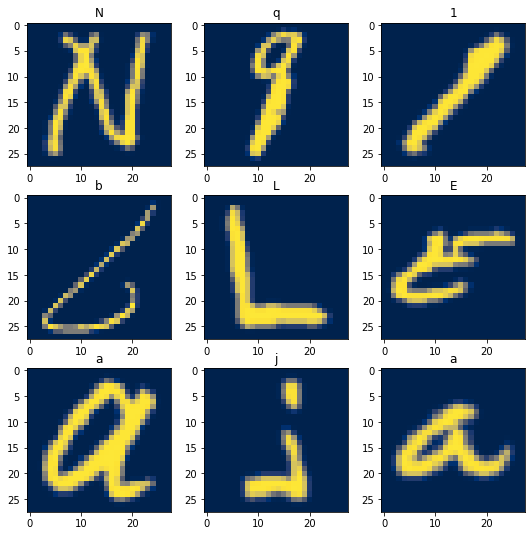

In [ ]:
fig, axs = plt.subplots(figsize=(9, 9), nrows=3, ncols=3)
axs = axs.flatten()
for _, ax in enumerate(axs):
    i = np.random.randint(0, high=len(data.data_test))
    image, label = data.data_test[i]
    ax.imshow(image.squeeze(0), cmap='cividis')
    ax.set_title(data.mapping[label])

## Take a CNN model

In [ ]:
import pytorch_lightning as pl
from text_recognizer.models import CNN
from text_recognizer.lit_models import BaseLitModel

In [ ]:
model = CNN(data_config=data.config())
lit_model = BaseLitModel(model=model)
trainer = pl.Trainer(gpus=1, max_epochs=5)

/usr/local/lib/python3.7/dist-packages/deprecate/deprecation.py:115: LightningDeprecationWarning: The `Accuracy` was deprecated since v1.3.0 in favor of `torchmetrics.classification.accuracy.Accuracy`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [ ]:
trainer.fit(lit_model, datamodule=data)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  f"DataModule.{name} has already been called, so it will not be called again. "
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type     | Params
---------------------------------------
0 | model     | CNN      | 1.7 M 
1 | train_acc | Accuracy | 0     
2 | val_acc   | Accuracy | 0     
3 | test_acc  | Accuracy | 0     
---------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.616     Total estimated model params size (MB)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
x, y = next(iter(data.test_dataloader()))

print(model.training)
logits = model(x)
print(logits.shape)

preds = logits.argmax(-1)
print(y, preds)


True
torch.Size([128, 83])
tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4]) tensor([28,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4, 28,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        28, 28,  4,  4, 28,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 28,  4,  4,
         4, 28,  4,  4,  4,  4,  4, 28,  4, 28,  4, 28, 28,  4,  4,  4,  4,  4,
         4, 28,  4,  4, 28,  4,  4, 28,  4,  4,  4,  4,  4,  4,  4,  4, 28,  4,
         4,  4,  4,  4,  4, 28,  4,  9,  4, 54,  4,  4,  4,  4,  4,  4,  4, 54,
         4, 28,  4,  4,  4,  4,  4, 28,  4,  4,  4,  4,  4, 

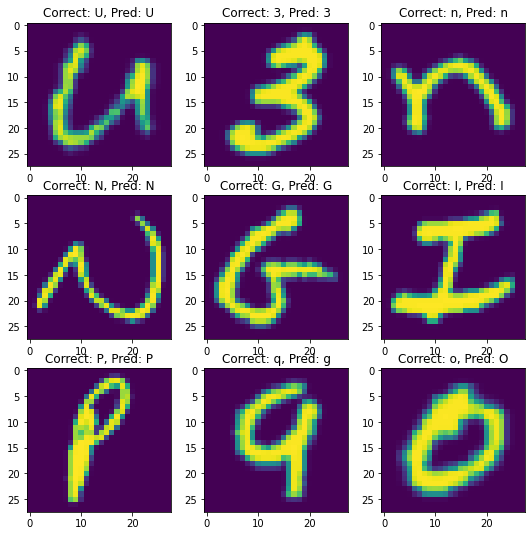

In [ ]:
model.eval();

_, axs = plt.subplots(figsize=(9, 9), nrows=3, ncols=3)
axs = axs.flatten()
for ax in axs:
    i = np.random.randint(low=0, high=len(data.data_test))
    image, label = data.data_test[i]

    image_for_model = image.unsqueeze(0)
    logits = model(image_for_model)
    pred_ind = logits.argmax(-1)
    pred_label = data.mapping[pred_ind]

    ax.imshow(image.squeeze(0));
    ax.set_title(f'Correct: {data.mapping[label]}, Pred: {pred_label}');
